# DameJidlo.cz data exploration

In [1]:
# import basic stuff
import os
import pandas as pd
from sklearn import tree
import pandas_profiling
import glob

In [26]:
# see what data we got
os.chdir("../data/")
datafiles = glob.glob("*.csv")
datafiles

['in.c_damejidlo.dj_orders_fields_data.csv',
 'tree_basic.csv',
 'in.c_damejidlo.dj_orders_data.csv']

In [27]:
# load orders
orders = pd.read_csv(datafiles[0])

In [12]:
orders.head(20)

,id_order,id_restaurant,datum_cas_objednavky,datum_objednavky,polozka_objednavky,id_order_field,pocet_polozek,cena
0,1052605432,21217,2018-03-30 15:16:08,2018-03-30,Hranolky,1083236366,2.0,49.0
1,1053628772,5903,2018-05-21 09:50:31,2018-05-21,Garni Lilek Vegi,1085187595,1.0,139.0
2,1053443582,16621,2018-05-12 18:32:12,2018-05-12,111. Tandoori Nan,1084835784,2.0,33.0
3,1054389882,14805,2018-06-28 12:28:16,2018-06-28,Caesar salát - Grilled chicken,1086634975,1.0,110.0
4,1052958123,9949,2018-04-18 13:57:34,2018-04-18,"Chicken Pad Thai (1,3,4,5,6)",1083914444,1.0,129.0
5,1054098486,19411,2018-06-14 10:48:51,2018-06-14,2. asijská čirá s kuřecím masem a rýžovýni nud...,1086076622,1.0,39.0
6,1053638748,19187,2018-05-21 17:30:25,2018-05-21,California set,1085205256,2.0,335.0
7,1054074226,9997,2018-06-13 09:59:37,2018-06-13,"Curry Salmon Fried Rice (1,4,6)",1086032314,2.0,159.0
8,1054080028,21682,2018-06-13 12:25:41,2018-06-13,G4. Smažené rýžové nudle s gyrosem,1086042187,1.0,109.0
9,1052542872,17527,2018-03-27 13:35:15,2018-03-27,D1 Domácí Tiramisu,1083115296,1.0,49.0


In [22]:
# let's try profiling
pandas_profiling.ProfileReport(orders)

Number of variables,8
Number of observations,519310
Total Missing (%),0.0%
Total size in memory,31.7 MiB
Average record size in memory,64.0 B
Numeric,4
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [23]:
# load items
items = pd.read_csv(datafiles[2])

In [24]:
pandas_profiling.ProfileReport(items)

Number of variables,47
Number of observations,179443
Total Missing (%),9.9%
Total size in memory,64.3 MiB
Average record size in memory,376.0 B
Numeric,19
Categorical,17
Boolean,1
Date,0
Text (Unique),0
Rejected,10


# Decision Trees testing

In [2]:
df = pd.DataFrame({'cell':[1,1,1,1,0,1,0,1],'games':[1,1,0,1,0,0,0,1],'garden':[0,0,0,1,1,1,1,0],'age':['junior','junior','mid-age','mid-age','senior','senior','senior','junior']})
df

,age,cell,games,garden
0,junior,1,1,0
1,junior,1,1,0
2,mid-age,1,0,0
3,mid-age,1,1,1
4,senior,0,0,1
5,senior,1,0,1
6,senior,0,0,1
7,junior,1,1,0


In [28]:
DT = tree.DecisionTreeClassifier(min_samples_leaf=4)

In [4]:
type(DT)

sklearn.tree.tree.DecisionTreeClassifier

In [5]:
df_dummies = pd.get_dummies(df)

In [6]:
df_dummies.head()

,cell,games,garden,age_junior,age_mid-age,age_senior
0,1,1,0,1,0,0
1,1,1,0,1,0,0
2,1,0,0,0,1,0
3,1,1,1,0,1,0
4,0,0,1,0,0,1


In [31]:
orders.columns
orders_dummy = pd.get_dummies(orders[['id_restaurant', 'datum_objednavky','polozka_objednavky','cena']])

KeyboardInterrupt: 

In [25]:
DT = DT.fit(orders[['id_restaurant','datum_objednavky','polozka_objednavky']],orders[['age']])

NameError: name 'orders' is not defined

In [8]:
import graphviz

In [13]:
dot_data = tree.export_graphviz(DT, out_file=None, feature_names=['garden','cell','games'], class_names=['junior','mid-age','senior'], filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  

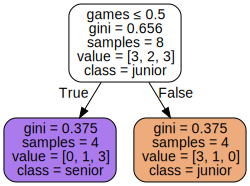

In [14]:
graph

In [15]:
DT_overfitted = tree.DecisionTreeClassifier()

In [16]:
DT_overfitted = DT_overfitted.fit(df[['garden','cell','games']],df[['age']])

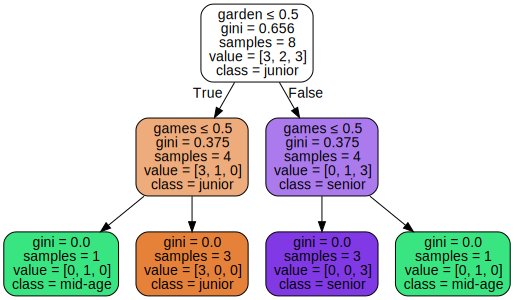

In [17]:
dot_data = tree.export_graphviz(DT_overfitted, out_file=None, feature_names=['garden','cell','games'], class_names=['junior','mid-age','senior'], filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)
graph

In [18]:
DT_pred = DT.predict(df[['garden','cell','games']])

In [19]:
DT_pred

array(['junior', 'junior', 'senior', 'junior', 'senior', 'senior',
       'senior', 'junior'], dtype=object)

In [20]:
df['age']

0     junior
1     junior
2    mid-age
3    mid-age
4     senior
5     senior
6     senior
7     junior
Name: age, dtype: object

In [21]:
DT_overfitted.predict(df[['garden','cell','games']])

array(['junior', 'junior', 'mid-age', 'mid-age', 'senior', 'senior',
       'senior', 'junior'], dtype=object)

In [22]:
df = pd.DataFrame({'cell':[1,1,1,1,0,1,0,1],'games':[1,1,0,1,0,0,0,1],'garden':[0,0,0,1,1,1,1,0],'price':['1','1','0','1','0','0','0','1']})
df

,cell,games,garden,price
0,1,1,0,1
1,1,1,0,1
2,1,0,0,0
3,1,1,1,1
4,0,0,1,0
5,1,0,1,0
6,0,0,1,0
7,1,1,0,1


In [23]:
DT_overfitted = DT_overfitted.fit(df[['garden','cell','games']],df[['price']])

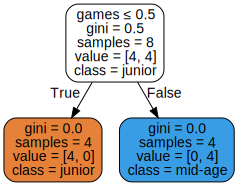

In [24]:
dot_data = tree.export_graphviz(DT_overfitted, out_file=None, feature_names=['garden','cell','games'], class_names=['junior','mid-age','senior'], filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)
graph